In [ ]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import os


import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
df=pd.read_csv("/content/listings.csv")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,149,5,24,2022-07-13,0.17,3,212,10,119-269-5808-01R
1,34843927,Simply Paradise Glamping,262664392,Adriano And Julia,Hawaii,North Kona,19.66220,-155.95681,Private room,83,1,194,2022-08-25,5.90,3,334,96,NaN
2,35066424,Spacious 3 Bedroom 3 Bath + Loft at Alii Cove,264152810,Robyn,Hawaii,North Kona,19.62768,-155.98543,Entire home/apt,175,30,2,2022-02-19,0.25,1,197,2,NaN
3,35067513,"Noah’s Hideaway Maui, Luxury B&B, Walk to Beach!",264162605,Fadi,Maui,Lahaina,20.91764,-156.68840,Entire home/apt,622,1,70,2022-06-24,1.80,2,191,5,"440090330000, TA-197-216-9216-01"
4,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,91,5,201,2022-09-03,1.31,3,166,19,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28580 entries, 0 to 28579
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              28580 non-null  int64  
 1   name                            28580 non-null  object 
 2   host_id                         28580 non-null  int64  
 3   host_name                       28446 non-null  object 
 4   neighbourhood_group             28580 non-null  object 
 5   neighbourhood                   28580 non-null  object 
 6   latitude                        28580 non-null  float64
 7   longitude                       28580 non-null  float64
 8   room_type                       28580 non-null  object 
 9   price                           28580 non-null  int64  
 10  minimum_nights                  28580 non-null  int64  
 11  number_of_reviews               28580 non-null  int64  
 12  last_review                     

In [ ]:
df.shape


(28580, 18)

In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
28575,32448015,Kahuna Bungalow at Pakalana Sanctuary Puako,3299481,Roth,Hawaii,South Kohala,19.96992,-155.84321,Private room,300,2,32,2022-07-14,0.86,6,0,10,TA-177-225-1648-01
28576,52074454,Private room in our home near beach w/SUV option,2773101,Lisa,Honolulu,Ewa,21.32377,-157.97581,Private room,55,100,0,NaN,NaN,1,83,0,NaN
28577,27209676,Luxurious Oceanfront Beach House w/AC & Stunni...,107293305,Elite Pacific By Gather,Hawaii,South Kohala,19.96680,-155.84840,Entire home/apt,2300,1,8,2022-07-31,0.18,306,0,3,TA-180-877-8240-01 STVR 19-351310
28578,45972779,Incredible 4 Bedrooms with Ocean Views through...,10219064,Bob,Kauai,Koloa-Poipu,21.87031,-159.44706,Entire home/apt,999,5,0,NaN,NaN,48,0,0,280190040015
28579,46063715,Great value at this 2 Bedroom Princeville Villa!,10219064,Bob,Kauai,North Shore Kauai,22.22897,-159.47531,Entire home/apt,425,5,0,NaN,NaN,48,0,0,540050120028


In [ ]:
df.drop(['id','host_id','host_name','last_review'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

name                                 0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5539
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           4705
dtype: int64

In [ ]:
def impute_median(series):
    return series.fillna(series.median())

In [ ]:
df.reviews_per_month=df["reviews_per_month"].transform(impute_median)

In [ ]:
df.isnull().sum()

name                                 0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           4705
dtype: int64

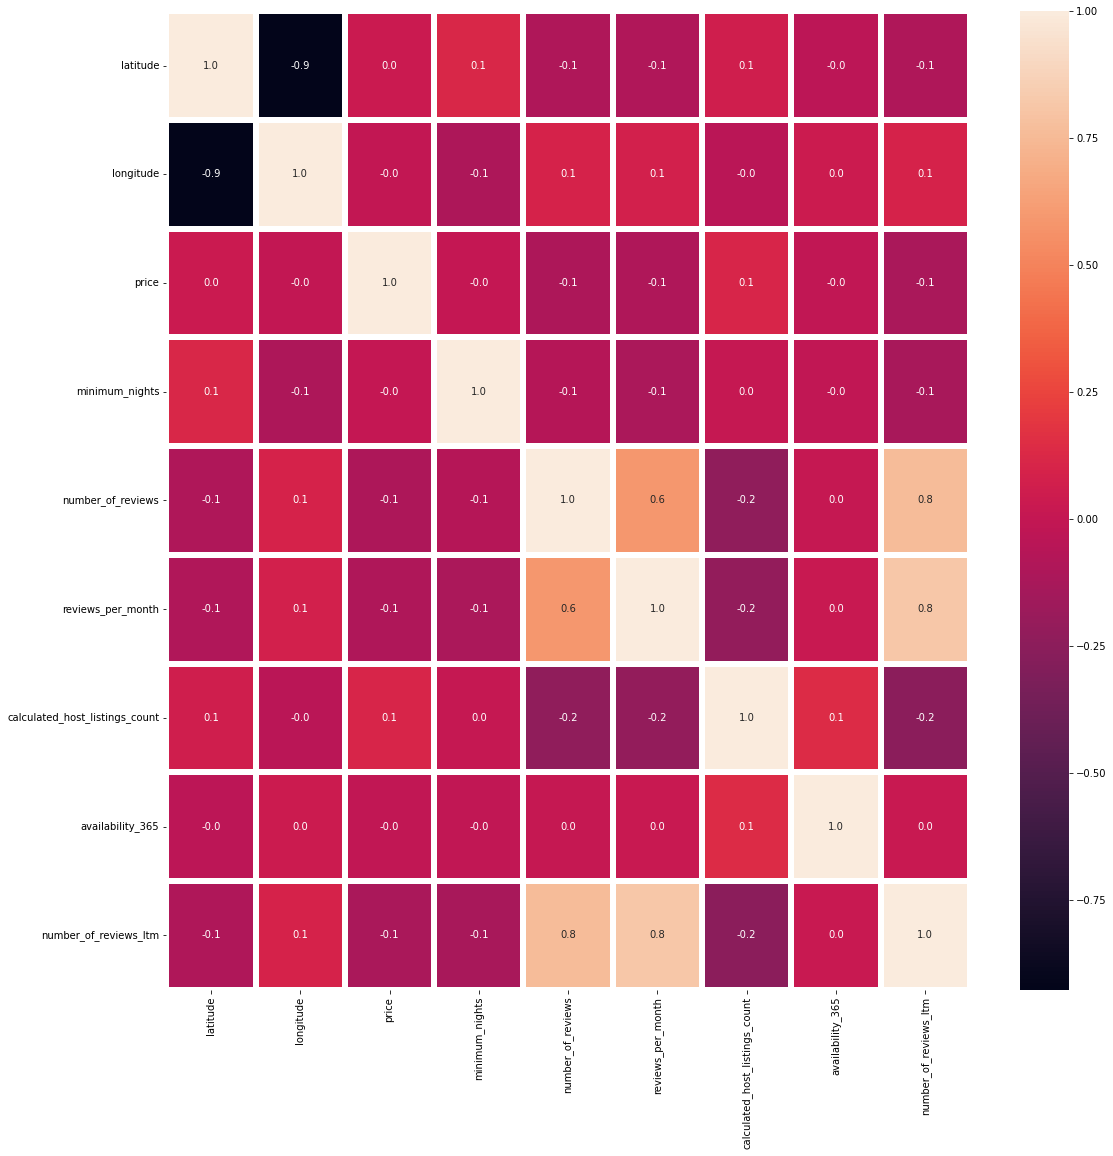

In [ ]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

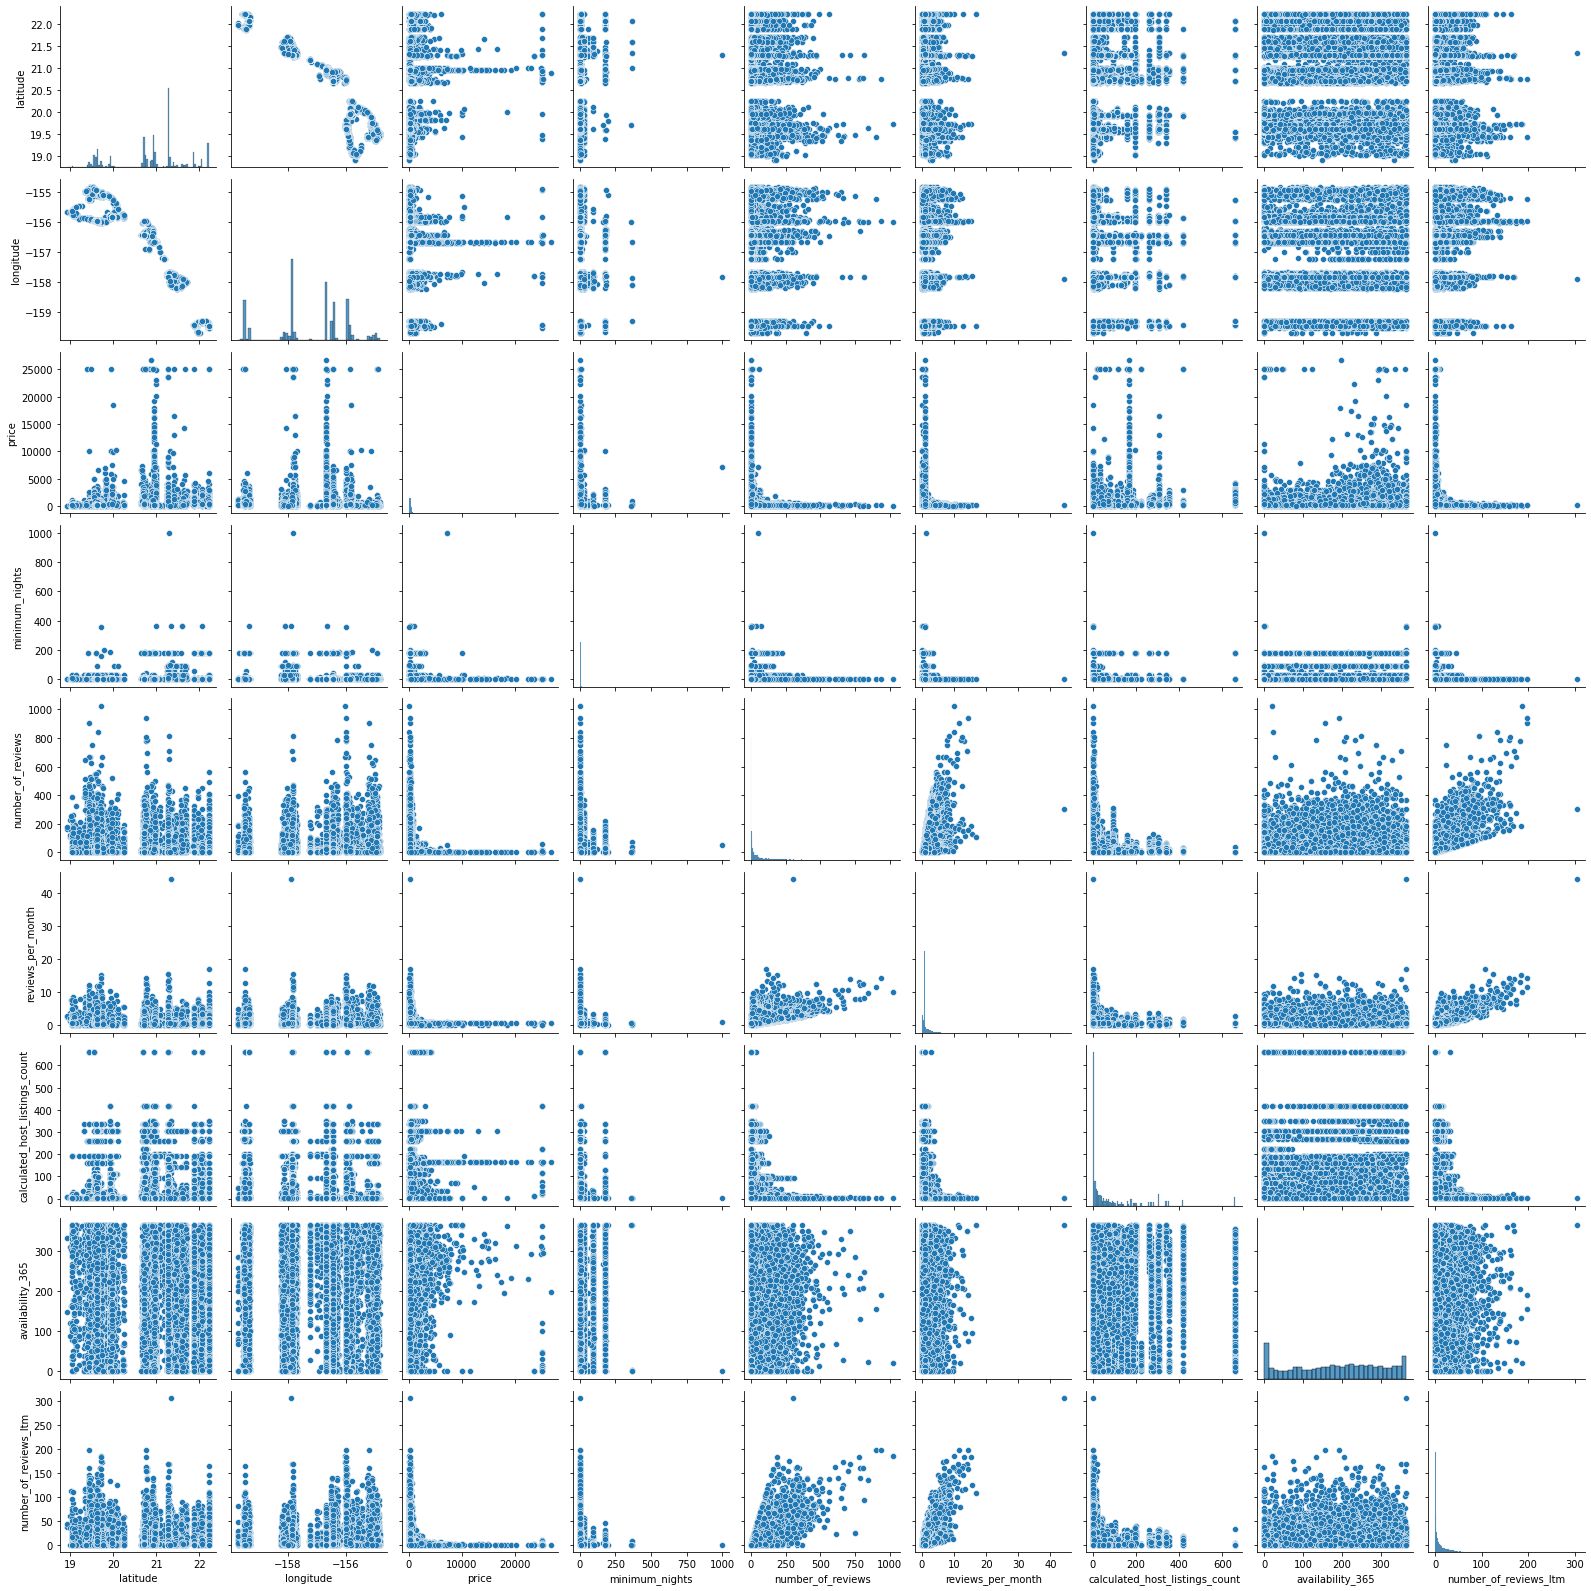

In [ ]:
sns.pairplot(df)
plt.show()

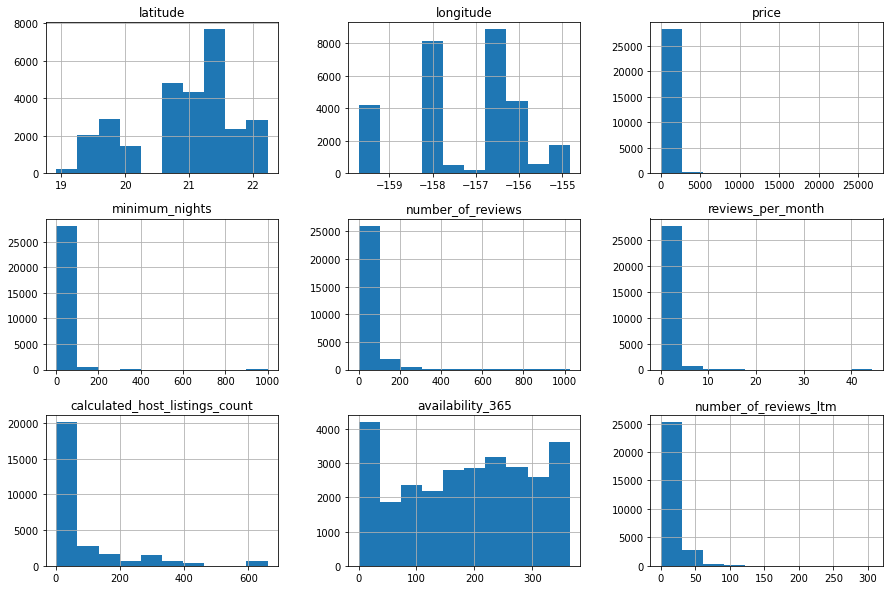

In [ ]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [ ]:
df.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
df.nunique()

name                              27535
neighbourhood_group                   4
neighbourhood                        30
latitude                          20504
longitude                         19191
room_type                             4
price                              1852
minimum_nights                       53
number_of_reviews                   443
reviews_per_month                   766
calculated_host_listings_count      108
availability_365                    366
number_of_reviews_ltm               157
license                           18119
dtype: int64

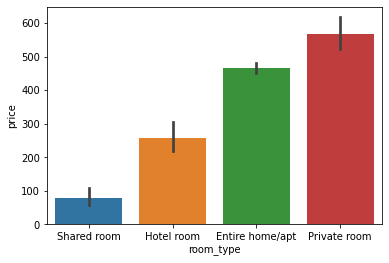

In [ ]:
#room_type - price
result = df.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

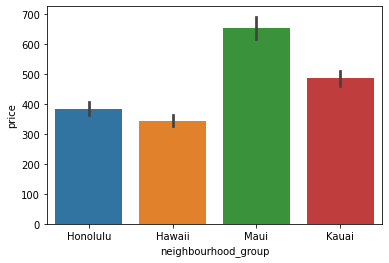

In [ ]:
#neighbourhood_group - price
result = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

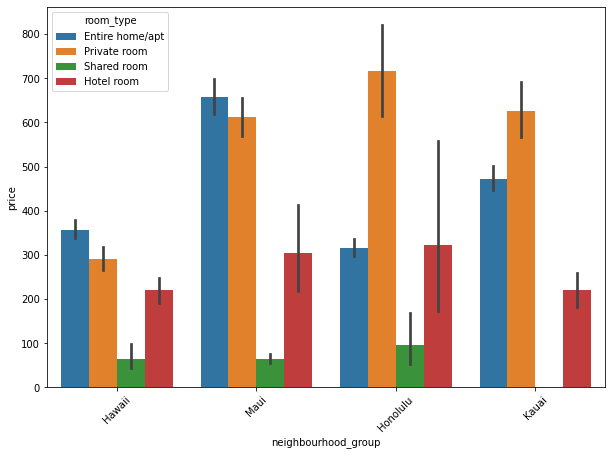

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.price.max()

26774

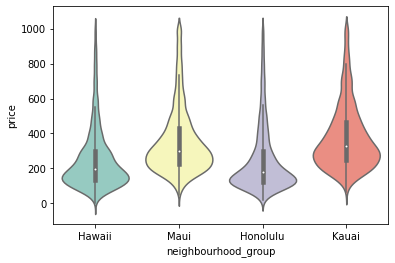

In [ ]:
ax = sns.violinplot(x="neighbourhood_group", y="price",
                    data=df[df.price < 1000],
                    scale="width", palette="Set3")

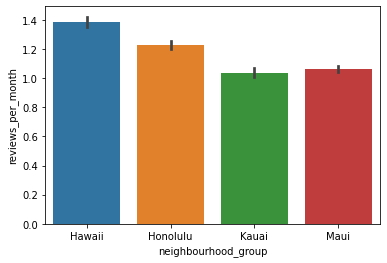

In [ ]:
#neighbourhood_group - reviews_per_month
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

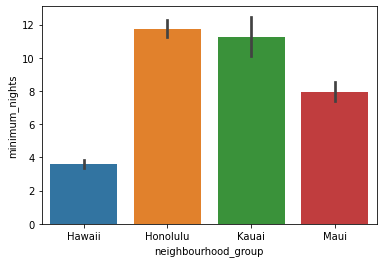

In [ ]:
#neighbourhood_group - minimum_nights
result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

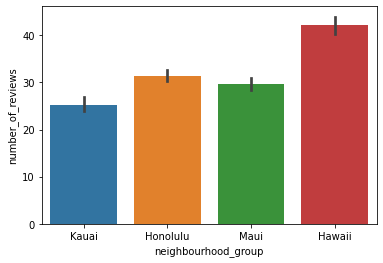

In [ ]:
#neighbourhood_group - number_of_reviews
result = df.groupby(["neighbourhood_group"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='neighbourhood_group', y="number_of_reviews", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

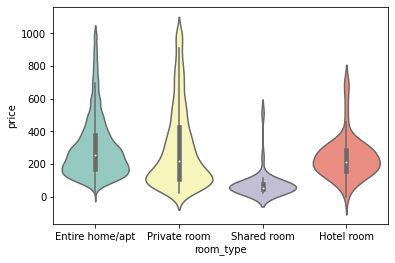

In [ ]:
ax = sns.violinplot(x="room_type", y="price",
                    data=df[df.price < 1000],
                    scale="width", palette="Set3")

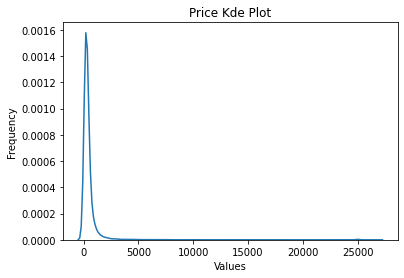

In [ ]:
sns.kdeplot(df['price'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Price Kde Plot')
plt.show()

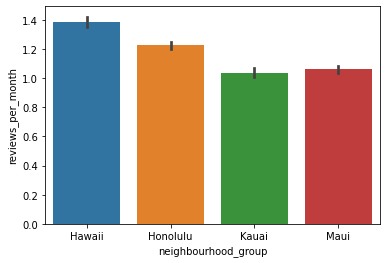

In [ ]:
#neighbourhood_group - reviews_per_month
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

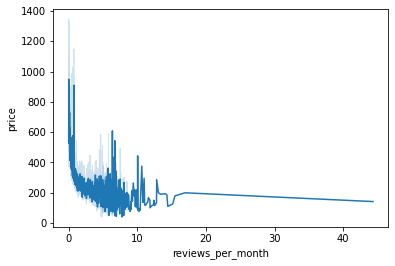

In [ ]:
sns.lineplot(x='reviews_per_month',y='price',data=df)
plt.show()

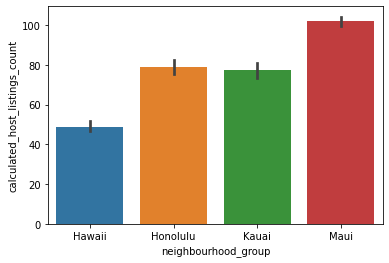

In [ ]:
#neighbourhood_group - calculated_host_listings_count
result = df.groupby(["neighbourhood_group"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='neighbourhood_group', y="calculated_host_listings_count", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

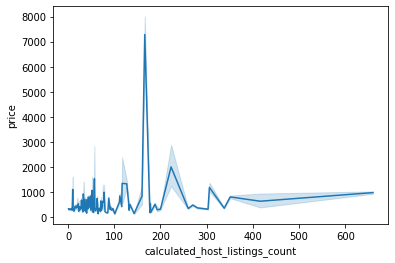

In [ ]:
sns.lineplot(x='calculated_host_listings_count',y='price',data=df)
plt.show()

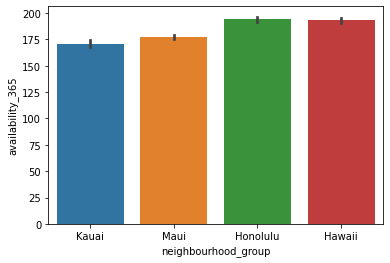

In [ ]:
#neighbourhood_group - availability_365
result = df.groupby(["neighbourhood_group"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='neighbourhood_group', y="availability_365", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

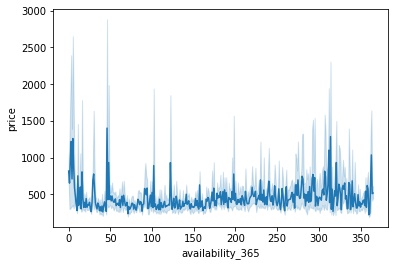

In [ ]:
sns.lineplot(x='availability_365',y='price',data=df)
plt.show()

In [ ]:
df.price.describe().T

count    28580.000000
mean       476.107558
std       1304.712077
min          0.000000
25%        167.000000
50%        266.000000
75%        432.000000
max      26774.000000
Name: price, dtype: float64

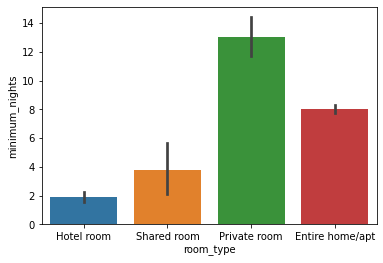

In [ ]:
#room_type - minimum_nights
result = df.groupby(["room_type"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='room_type', y="minimum_nights", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

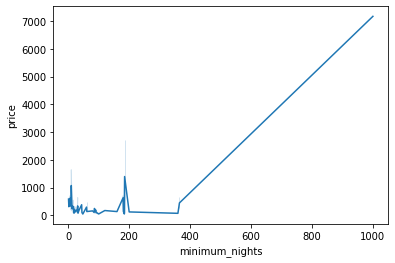

In [ ]:
sns.lineplot(x='minimum_nights',y='price',data=df)
plt.show()

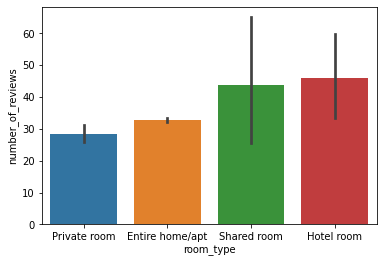

In [ ]:
#room_type - number_of_reviews
result = df.groupby(["room_type"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x='room_type', y="number_of_reviews", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

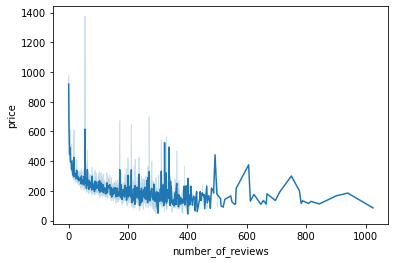

In [ ]:
sns.lineplot(x='number_of_reviews',y='price',data=df)
plt.show()

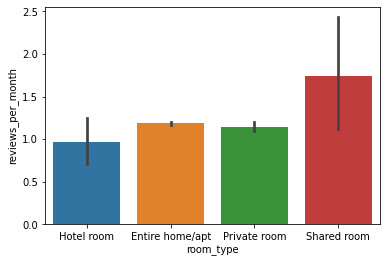

In [ ]:
#room_type - reviews_per_month
result = df.groupby(["room_type"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='room_type', y="reviews_per_month", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

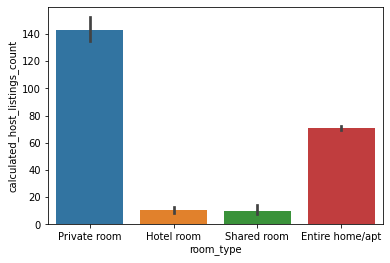

In [ ]:
#room_type - calculated_host_listings_count
result = df.groupby(["room_type"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x='room_type', y="calculated_host_listings_count", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

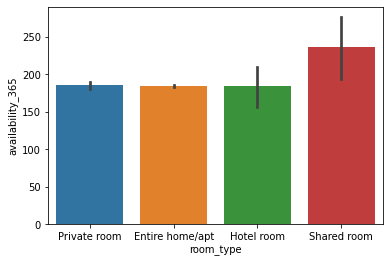

In [ ]:
#room_type - availability_365
result = df.groupby(["room_type"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x='room_type', y="availability_365", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

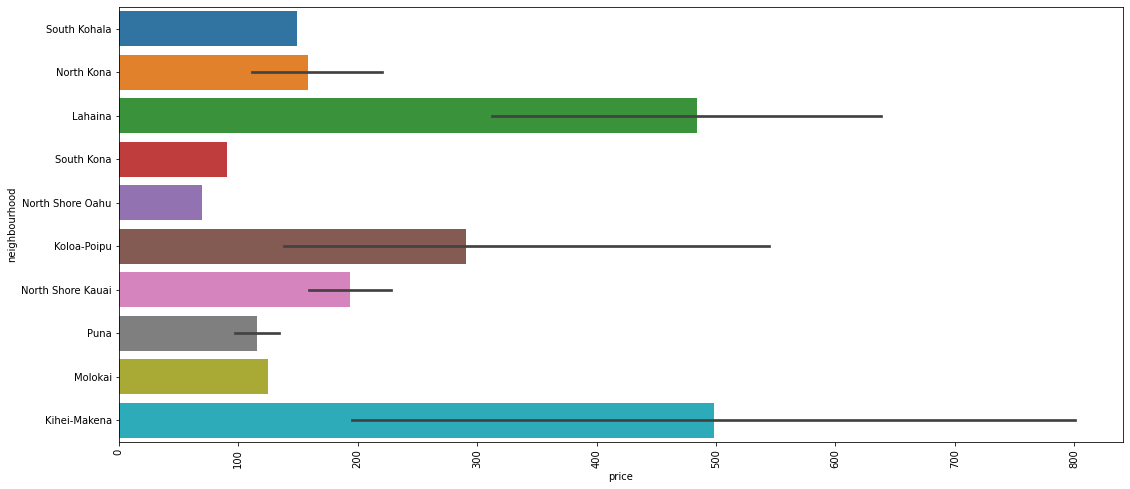

In [ ]:
#neighbourhood - price
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x=df.price[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

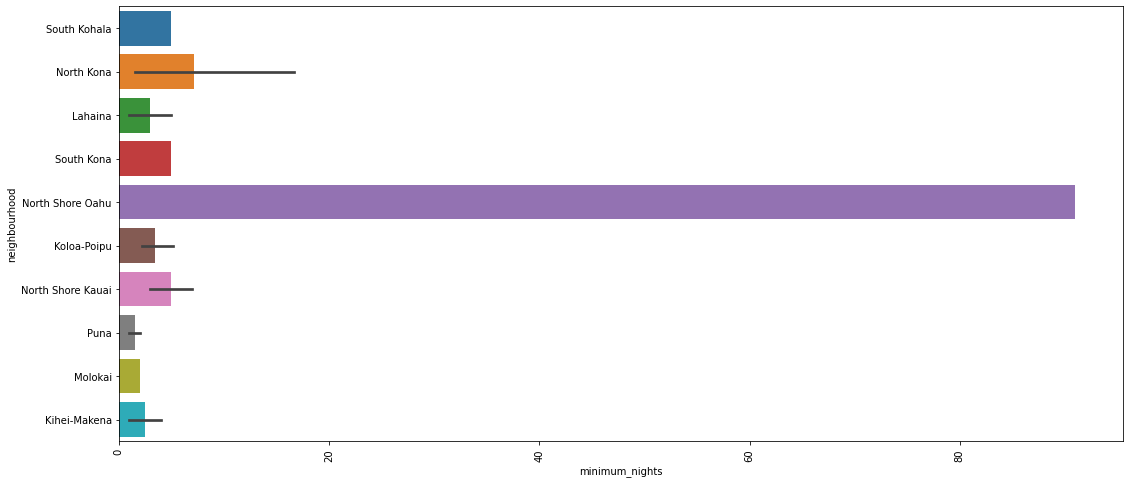

In [ ]:
#neighbourhood - minimum_nights
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x=df.minimum_nights[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

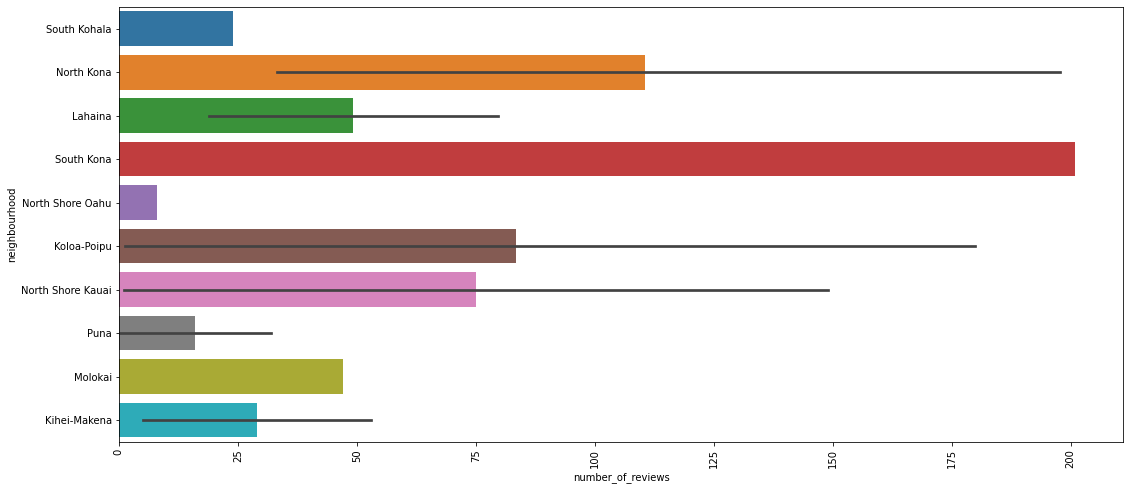

In [ ]:
#neighbourhood - number_of_reviews
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x=df.number_of_reviews[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

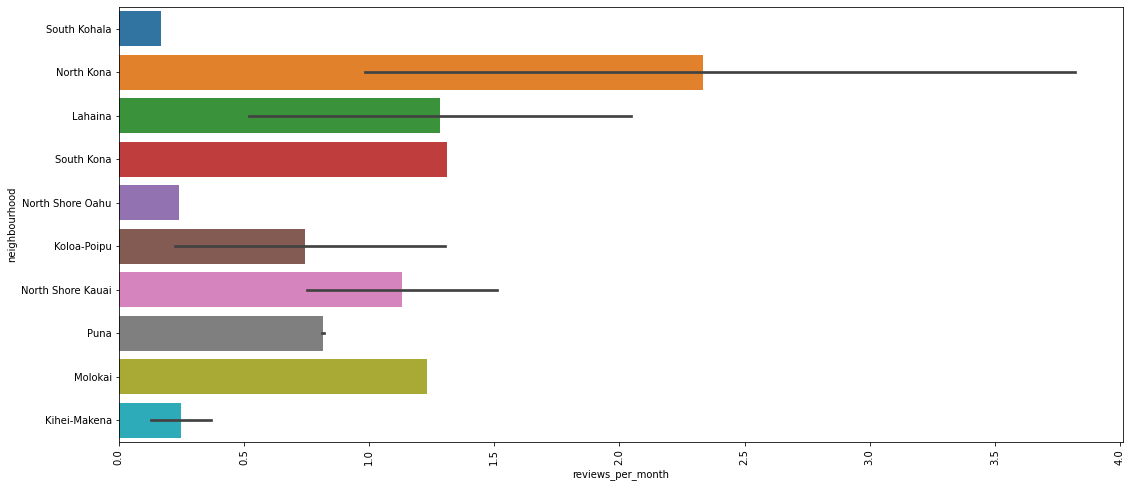

In [ ]:
#neighbourhood - reviews_per_month
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x=df.reviews_per_month[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

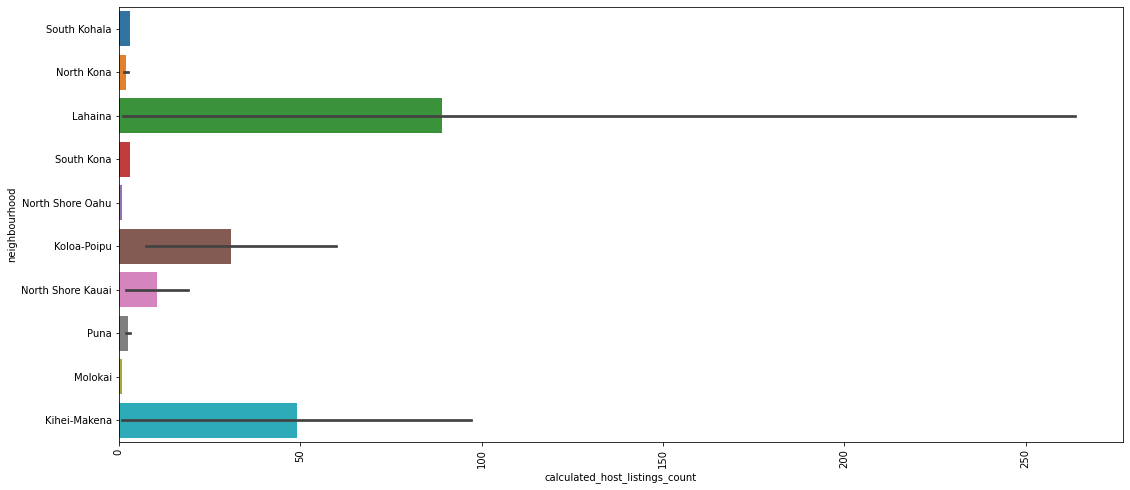

In [ ]:
#neighbourhood - calculated_host_listings_count
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x=df.calculated_host_listings_count[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

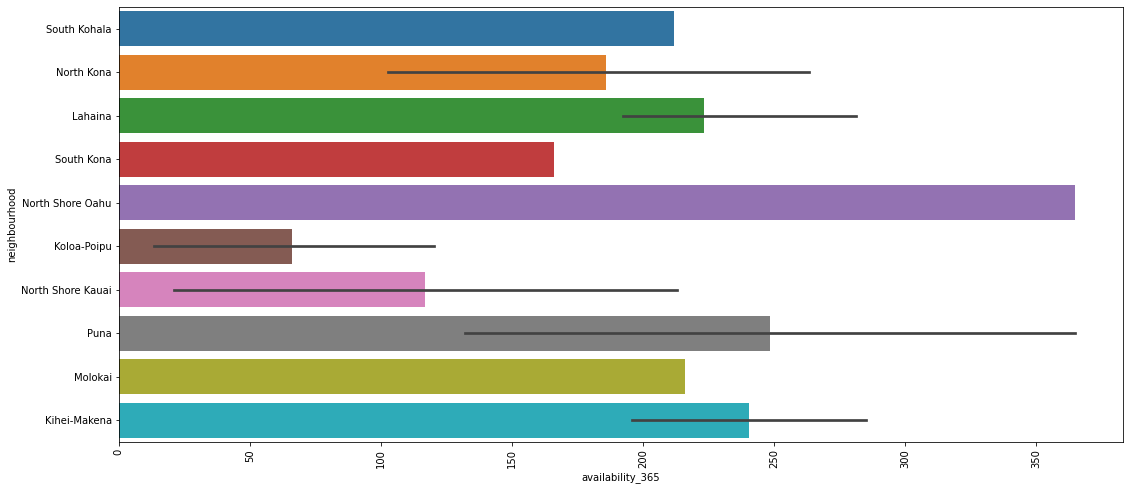

In [ ]:
#neighbourhood - availability_365
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')
sns.barplot(x=df.availability_365[:25], y=df.neighbourhood[:25]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = df.sort_values(by=["price"], ascending=False)
df['rank']=tuple(zip(df.price))
df['rank']=df.groupby('price',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rank
20477,"K B M Resorts- BAY-35 Presidential 5bd, 5ba be...",Maui,Lahaina,20.88017,-156.68492,Entire home/apt,26774,1,0,0.81,166,198,0,"450040490000, TA-041-615-7216-01",0
26827,"K B M Resorts- HALE-1470 Presidential 3bd, 3ba...",Maui,Kihei-Makena,20.74481,-156.45552,Entire home/apt,25159,1,0,0.81,166,295,0,"390090250000, TA-158-285-9776-01",0
9040,Partial Ocean View 2nd Floor on Golf Course GC72,Maui,Kihei-Makena,20.69138,-156.43682,Entire home/apt,25000,3,0,0.81,223,11,0,"210081040072, TA-100-860-0064-01",0
13783,"Ground Floor, Steps from Pool, Kam Beach I, MV...",Maui,Kihei-Makena,20.72506,-156.44751,Entire home/apt,25000,3,0,0.81,223,6,0,"390180030104, TA-137-426-3808-01",0
8920,Garden View A/C Wifi Across Beach Park KS6108,Maui,Kihei-Makena,20.71190,-156.44413,Entire home/apt,25000,3,0,0.81,223,14,0,"390040040212, TA-005-859-1232-01",0


In [ ]:
df.reset_index(inplace=True,drop=True)
df.head(5)

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rank
0,"K B M Resorts- BAY-35 Presidential 5bd, 5ba be...",Maui,Lahaina,20.88017,-156.68492,Entire home/apt,26774,1,0,0.81,166,198,0,"450040490000, TA-041-615-7216-01",0
1,"K B M Resorts- HALE-1470 Presidential 3bd, 3ba...",Maui,Kihei-Makena,20.74481,-156.45552,Entire home/apt,25159,1,0,0.81,166,295,0,"390090250000, TA-158-285-9776-01",0
2,Partial Ocean View 2nd Floor on Golf Course GC72,Maui,Kihei-Makena,20.69138,-156.43682,Entire home/apt,25000,3,0,0.81,223,11,0,"210081040072, TA-100-860-0064-01",0
3,"Ground Floor, Steps from Pool, Kam Beach I, MV...",Maui,Kihei-Makena,20.72506,-156.44751,Entire home/apt,25000,3,0,0.81,223,6,0,"390180030104, TA-137-426-3808-01",0
4,Garden View A/C Wifi Across Beach Park KS6108,Maui,Kihei-Makena,20.71190,-156.44413,Entire home/apt,25000,3,0,0.81,223,14,0,"390040040212, TA-005-859-1232-01",0


In [ ]:
df_rich_hosts=pd.DataFrame(df.iloc[:,0:2])
df_rich_hosts['latitude']=df.iloc[:,3]
df_rich_hosts['longitude']=df.iloc[:,4]
df_rich_hosts['room_type']=df.iloc[:,5]
df_rich_hosts['price']=df.iloc[:,6]
df_rich_hosts.head()

,name,neighbourhood_group,latitude,longitude,room_type,price
0,"K B M Resorts- BAY-35 Presidential 5bd, 5ba be...",Maui,20.88017,-156.68492,Entire home/apt,26774
1,"K B M Resorts- HALE-1470 Presidential 3bd, 3ba...",Maui,20.74481,-156.45552,Entire home/apt,25159
2,Partial Ocean View 2nd Floor on Golf Course GC72,Maui,20.69138,-156.43682,Entire home/apt,25000
3,"Ground Floor, Steps from Pool, Kam Beach I, MV...",Maui,20.72506,-156.44751,Entire home/apt,25000
4,Garden View A/C Wifi Across Beach Park KS6108,Maui,20.71190,-156.44413,Entire home/apt,25000


In [ ]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
df[df.room_type=="Private room"].describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,3324.0,20.836840,0.845615,18.92025,19.758567,21.277359,21.288318,22.228025
longitude,3324.0,-157.158552,1.300636,-159.67042,-157.838163,-157.821260,-155.977093,-154.839500
price,3324.0,566.450060,1420.672122,23.00000,120.000000,273.500000,641.750000,23571.000000
minimum_nights,3324.0,13.029783,41.060073,1.00000,1.000000,2.000000,4.000000,1000.000000
number_of_reviews,3324.0,28.554152,74.260611,0.00000,0.000000,1.000000,18.000000,1025.000000
reviews_per_month,3324.0,1.148306,1.569235,0.01000,0.560000,0.810000,0.872500,44.350000
calculated_host_listings_count,3324.0,142.700060,253.739969,1.00000,3.000000,9.000000,72.750000,660.000000
availability_365,3324.0,185.343261,132.904473,0.00000,55.000000,182.000000,326.000000,365.000000
number_of_reviews_ltm,3324.0,8.428700,20.032100,0.00000,0.000000,0.000000,6.000000,306.000000
rank,3324.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


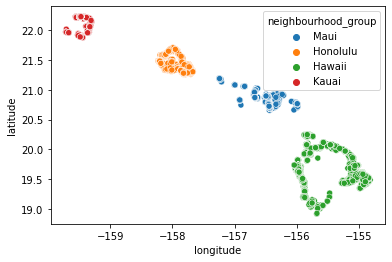

In [ ]:
sns.scatterplot(df_rich_hosts.longitude,df_rich_hosts.latitude,hue=df_rich_hosts.neighbourhood_group)
plt.ioff()

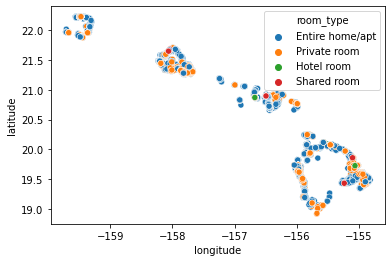

In [ ]:
sns.scatterplot(df_rich_hosts.longitude,df_rich_hosts.latitude,hue=df_rich_hosts.room_type)
plt.ioff()

In [ ]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df_rich_hosts[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

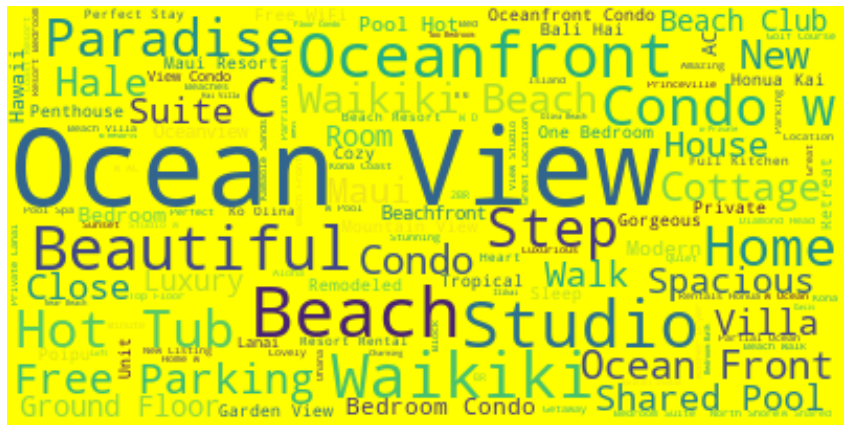

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df_rich_hosts.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/content/listings.csv")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,149,5,24,2022-07-13,0.17,3,212,10,119-269-5808-01R
1,34843927,Simply Paradise Glamping,262664392,Adriano And Julia,Hawaii,North Kona,19.66220,-155.95681,Private room,83,1,194,2022-08-25,5.90,3,334,96,NaN
2,35066424,Spacious 3 Bedroom 3 Bath + Loft at Alii Cove,264152810,Robyn,Hawaii,North Kona,19.62768,-155.98543,Entire home/apt,175,30,2,2022-02-19,0.25,1,197,2,NaN
3,35067513,"Noah’s Hideaway Maui, Luxury B&B, Walk to Beach!",264162605,Fadi,Maui,Lahaina,20.91764,-156.68840,Entire home/apt,622,1,70,2022-06-24,1.80,2,191,5,"440090330000, TA-197-216-9216-01"
4,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,91,5,201,2022-09-03,1.31,3,166,19,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28580 entries, 0 to 28579
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              28580 non-null  int64  
 1   name                            28580 non-null  object 
 2   host_id                         28580 non-null  int64  
 3   host_name                       28446 non-null  object 
 4   neighbourhood_group             28580 non-null  object 
 5   neighbourhood                   28580 non-null  object 
 6   latitude                        28580 non-null  float64
 7   longitude                       28580 non-null  float64
 8   room_type                       28580 non-null  object 
 9   price                           28580 non-null  int64  
 10  minimum_nights                  28580 non-null  int64  
 11  number_of_reviews               28580 non-null  int64  
 12  last_review                     

In [ ]:
df.drop(columns="neighbourhood_group", inplace = True)
df.drop(columns="last_review", inplace = True)


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,South Kohala,20.02740,-155.70200,Entire home/apt,149,5,24,0.17,3,212,10,119-269-5808-01R
1,34843927,Simply Paradise Glamping,262664392,Adriano And Julia,North Kona,19.66220,-155.95681,Private room,83,1,194,5.90,3,334,96,NaN
2,35066424,Spacious 3 Bedroom 3 Bath + Loft at Alii Cove,264152810,Robyn,North Kona,19.62768,-155.98543,Entire home/apt,175,30,2,0.25,1,197,2,NaN
3,35067513,"Noah’s Hideaway Maui, Luxury B&B, Walk to Beach!",264162605,Fadi,Lahaina,20.91764,-156.68840,Entire home/apt,622,1,70,1.80,2,191,5,"440090330000, TA-197-216-9216-01"
4,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,South Kona,19.43081,-155.88069,Entire home/apt,91,5,201,1.31,3,166,19,NaN


In [ ]:
df["reviews_per_month"].fillna(0, inplace=True)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,South Kohala,20.02740,-155.70200,Entire home/apt,149,5,24,0.17,3,212,10,119-269-5808-01R
1,34843927,Simply Paradise Glamping,262664392,Adriano And Julia,North Kona,19.66220,-155.95681,Private room,83,1,194,5.90,3,334,96,NaN
2,35066424,Spacious 3 Bedroom 3 Bath + Loft at Alii Cove,264152810,Robyn,North Kona,19.62768,-155.98543,Entire home/apt,175,30,2,0.25,1,197,2,NaN
3,35067513,"Noah’s Hideaway Maui, Luxury B&B, Walk to Beach!",264162605,Fadi,Lahaina,20.91764,-156.68840,Entire home/apt,622,1,70,1.80,2,191,5,"440090330000, TA-197-216-9216-01"
4,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,South Kona,19.43081,-155.88069,Entire home/apt,91,5,201,1.31,3,166,19,NaN


In [ ]:
df["neighbourhood"].unique()

array(['South Kohala', 'North Kona', 'Lahaina', 'South Kona',
       'North Shore Oahu', 'Koloa-Poipu', 'North Shore Kauai', 'Puna',
       'Molokai', 'Kihei-Makena', 'Koolaupoko', 'Lihue',
       'Primary Urban Center', 'Ewa', 'South Hilo', 'Koolauloa',
       'Paia-Haiku', 'Waianae', 'Kapaa-Wailua', 'North Kohala',
       'East Honolulu', 'Wailuku-Kahului', 'Waimea-Kekaha', 'Kau',
       'Makawao-Pukalani-Kula', 'North Hilo', 'Hana', 'Hamakua', 'Lanai',
       'Central Oahu'], dtype=object)

In [ ]:
df["neighbourhood"].value_counts()

Primary Urban Center     6221
Lahaina                  4421
Kihei-Makena             4064
North Kona               3011
North Shore Kauai        1817
Koloa-Poipu              1389
South Kohala             1249
Puna                     1113
Kapaa-Wailua              697
Koolauloa                 568
Ewa                       516
South Hilo                513
Koolaupoko                455
North Shore Oahu          420
Lihue                     284
South Kona                267
Waianae                   241
Paia-Haiku                222
Kau                       220
East Honolulu             190
Molokai                   169
Wailuku-Kahului           139
North Kohala               93
Hana                       75
Hamakua                    66
Makawao-Pukalani-Kula      45
North Hilo                 43
Central Oahu               41
Waimea-Kekaha              24
Lanai                       7
Name: neighbourhood, dtype: int64

In [ ]:
df["room_type"].unique()
df["room_type"].value_counts()

Entire home/apt    25147
Private room        3324
Hotel room            73
Shared room           36
Name: room_type, dtype: int64

In [ ]:
df["host_id"].value_counts().head(10)

5615582      660
132087088    416
39073224     351
111808435    338
107293305    306
113441705    303
22635145     303
15820446     280
101401250    270
37839136     260
Name: host_id, dtype: int64

Text(0, 0.5, 'Number of Listings')

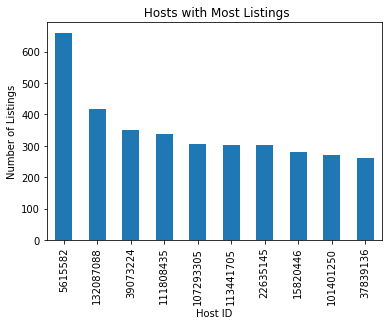

In [ ]:
chart1 = df["host_id"].value_counts().head(10).plot(kind="bar")
chart1.set_title(" Hosts with Most Listings")
chart1.set_xlabel("Host ID")
chart1.set_ylabel("Number of Listings")

Text(0, 0.5, 'Number of Listings')

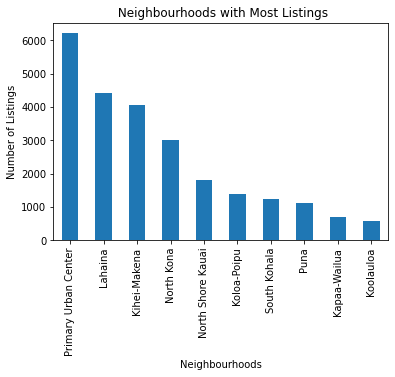

In [ ]:
chart2 = df["neighbourhood"].value_counts().head(10).plot(kind="bar")
chart2.set_title(" Neighbourhoods with Most Listings")
chart2.set_xlabel("Neighbourhoods")
chart2.set_ylabel("Number of Listings")

In [ ]:
neighbourhood_price = df.groupby("neighbourhood")["price"].agg(['mean'])

In [ ]:
neighbourhood_price.sort_values(by='mean', ascending=False)

,mean
neighbourhood,
Lahaina,839.190228
Koolaupoko,626.780220
East Honolulu,608.263158
Koloa-Poipu,576.187905
South Kohala,568.078463
Kihei-Makena,511.332185
Ewa,481.951550
Koolauloa,480.589789
North Shore Oahu,464.473810


Text(0.5, 1.0, 'Average Price of Neighbourhoods')

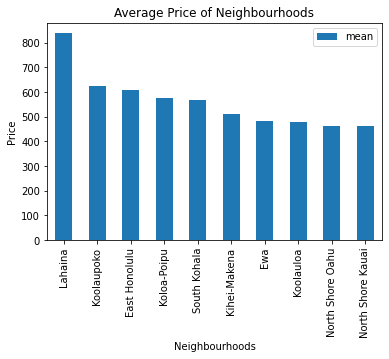

In [ ]:
chart3 = neighbourhood_price.sort_values(by='mean', ascending=False).head(10).plot(kind = "bar")
chart3.set_ylabel('Price')
chart3.set_xlabel('Neighbourhoods')
chart3.set_title("Average Price of Neighbourhoods")

In [ ]:
most_expensive_prices = df[df.price>5000].sort_values(by="price", ascending=False).head(10)
most_expensive_prices

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
20477,53150179,"K B M Resorts- BAY-35 Presidential 5bd, 5ba be...",429407284,Kbm,Lahaina,20.880170,-156.684920,Entire home/apt,26774,1,0,0.00,166,198,0,"450040490000, TA-041-615-7216-01"
26827,681900975699110880,"K B M Resorts- HALE-1470 Presidential 3bd, 3ba...",429407284,Kbm,Kihei-Makena,20.744810,-156.455520,Entire home/apt,25159,1,0,0.00,166,295,0,"390090250000, TA-158-285-9776-01"
15396,47374413,Wailea Grand Champions Unit 89: 2 Br Condo w/Golf,132087088,Maui Condo,Kihei-Makena,20.689460,-156.436850,Entire home/apt,25000,5,0,0.00,416,5,0,"210081040089, TA-078-921-5232-01"
1002,3759486,PuaMana 175-2,3364705,Jill,Lahaina,20.858840,-156.666410,Entire home/apt,25000,2,55,0.59,20,0,2,"460280520000, TA-117-755-4944-01"
8996,30963502,Oceanfront Complex Great Location Wifi WB118,51017586,Rentals Maui,Kihei-Makena,20.747900,-156.457520,Entire home/apt,25000,3,2,0.05,223,3,0,"390090290017, TA-031-159-1936-01"
9029,30963558,"Gorgeous Views On Golf Course, 2nd floor, A/C ...",51017586,Rentals Maui,Kihei-Makena,20.691014,-156.437466,Entire home/apt,25000,3,0,0.00,223,7,0,"210081040086, TA-171-430-5024-01"
9040,30963578,Partial Ocean View 2nd Floor on Golf Course GC72,51017586,Rentals Maui,Kihei-Makena,20.691380,-156.436820,Entire home/apt,25000,3,0,0.00,223,11,0,"210081040072, TA-100-860-0064-01"
9054,30963341,Partial Ocean View Pool Access Near beach KBS208,51017586,Rentals Maui,Kihei-Makena,20.763240,-156.458700,Entire home/apt,25000,3,5,0.13,223,0,0,"390011070067, TA-195-010-4064-01"
9077,30963410,"Large Lanai, Ground Flr, Partial Ocean View KS...",51017586,Rentals Maui,Kihei-Makena,20.713090,-156.446280,Entire home/apt,25000,3,0,0.00,223,3,0,"390040040003, TA-049-850-3680-01"
16562,48717024,Luana Waikiki Hotel & Suites 2 Br City View Suite,132087088,Maui Condo,Primary Urban Center,21.282580,-157.832930,Entire home/apt,25000,5,1,0.06,416,307,0,"260060020000, TA-203-276-4928-01"


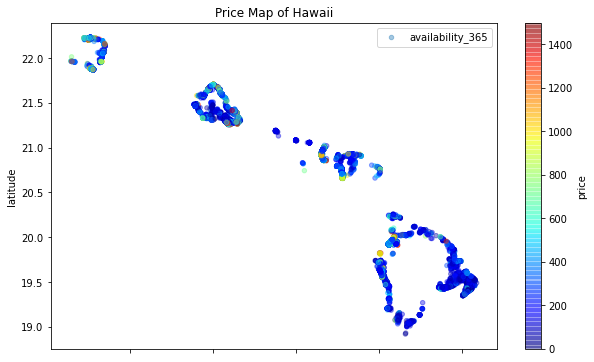

In [ ]:
ave_price=df[df.price < 1500]
chart4=ave_price.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,6))
chart4.set_title('Price Map of Hawaii')
chart4.set_xlabel('longitude')
chart4.legend()

In [ ]:
most_reviewed = df.nlargest(10, "number_of_reviews")
most_reviewed

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
879,2712170,"Chandy's ""Elua"" Just 2 miles from the Kona Air...",13880880,Chandy,North Kona,19.72225,-156.01579,Private room,85,1,1025,10.08,2,21,186,GE/TA197-922-6112-01
4516,18039677,Sunrise Studio at the Hana Bay B&B,123624556,Kaua,Hana,20.75799,-155.98589,Entire home/apt,185,1,940,14.32,3,191,198,"140140170000, TA-014-425-0880-02"
2556,11610598,4 minutes from the park! Travel tips!,31348206,David,Puna,19.43330,-155.22213,Entire home/apt,167,1,902,11.62,1,156,197,TA-173-775-8720-01
1866,8210925,Kona Town Oasis,43296752,Marc,North Kona,19.64111,-155.98938,Private room,112,1,844,9.89,3,24,134,NaN
1122,4069429,#Private Studio - Waikiki Dream,21105755,Dana,Primary Urban Center,21.28683,-157.83273,Entire home/apt,129,1,816,8.41,1,249,94,Exempt
4819,18912777,#1 Hamoa $115. per night for 2 people,131179825,Rolene,Hana,20.77293,-155.99953,Private room,115,1,808,12.55,4,209,161,"130080150000, TA-123-669-2992-02"
974,2987705,Kula Treat - Upcountry Maui with Hot Tub!,15234735,Pamela,Makawao-Pukalani-Kula,20.77603,-156.30985,Entire home/apt,133,1,788,7.86,2,132,139,"230220220000, TA-020-811-3664-01"
4813,18912029,#2 Keanini $115. per night for 2 people,131179825,Rolene,Hana,20.77461,-156.00116,Private room,115,1,783,12.15,4,234,159,"130080150000, TA-123-669-2992-02"
4485,18075653,Sunrise Suite at the Hana Bay B&B,123624556,Kaua,Hana,20.75885,-155.98774,Entire home/apt,200,1,777,13.08,3,205,182,"140140170000, TA-014-425-0880-02"
798,2615058,Dreamy Tropical Tree House 🌴,13392090,Kristie,Puna,19.49577,-155.15019,Entire home/apt,300,1,750,7.85,1,286,24,NaN
